# 1. Loading the Packages we Need

In [1]:
#For data manipulation
import pandas as pd
from pandas.errors import InvalidIndexError
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format}) #to change scientifc numbers to float

#For visualisation
import graphviz
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.figsize":(8,6)}) #to increase size of sns plots

#Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings("ignore")

#For preprocessing data 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample
#from imblearn.combine import SMOTEENN

#The ML Algo
from sklearn.ensemble import RandomForestClassifier

#ML Model Evaluation 
from sklearn.metrics import precision_score,recall_score, accuracy_score, roc_auc_score,r2_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.metrics import plot_confusion_matrix

# 2. Load the Raw Data into Python from a CSV File
This dataset was source from [Kaggle](https://www.kaggle.com/code/alexteboul/heart-disease-health-indicators-dataset-notebook/notebook)


In [26]:
import pandas as pd
df=pd.read_csv("heart.csv",error_bad_lines=False)
print(df.shape,"\n")
df.head()

(253680, 22) 



,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# 6 Further Pre-processing

## 6.1 Splitting the Raw Data 

In [3]:
#seperate majority and monority classes
df_majority=df[df.HeartDiseaseorAttack==0]
df_minority=df[df.HeartDiseaseorAttack==1]

print(df_majority.shape,df_minority.shape,"\n")

df_minority_upsampled=resample(df_minority,
                              replace=True, #sample with replacement
                               n_samples=df_majority.shape[0],
                               random_state=123
                              )
df=pd.concat([df_majority,df_minority_upsampled])
print(df.shape,"\n")
print(df["HeartDiseaseorAttack"].value_counts(),"\n")
df.head()

(229787, 22) (23893, 22) 

(459574, 22) 

0.0    229787
1.0    229787
Name: HeartDiseaseorAttack, dtype: int64 



,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
X,y=df.drop("HeartDiseaseorAttack",axis=1),df["HeartDiseaseorAttack"]#.values #X=attribures, y=Target vector
print("X_Shape:{}".format (np.shape(X)))
print("y_Shape:{}".format (np.shape(y)))

X_Shape:(459574, 21)
y_Shape:(459574,)


In [5]:
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.30, random_state=0)
print("Training cases : %d\nTest cases: %d" % (X_train.shape[0],X_test.shape[0]))

Training cases : 321701
Test cases: 137873


## 6.5 Changing Categorical Variables Numerical Values
We realize that all some columns have categorical values which are not ordinal - that is, they do not have any meaning attached to them. This can lead to misleading results. We will therefor  make them numerical in this section

In [6]:
categorical_feature=[7]
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])

#This is a manual code that could achieve the same goal
"""categ=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'PhysHlth', 'DiffWalk', 'Sex']
df=pd.get_dummies(df,columns=categ)
df.head()"""

"categ=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies',\n       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'PhysHlth', 'DiffWalk', 'Sex']\ndf=pd.get_dummies(df,columns=categ)\ndf.head()"

# 6.6 Scaling our Columns
We realised that some colunmns BMI,MentHlth and Age have quite some large values that need to be normalised so as to make sure that they all are on the same scale. The advantages of scaling are:
1. Normalise the distributions of our features which may incrase accuracy of our models
2. Make our ML algorithms run faster

In [7]:
numeric_features=[0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[('scaler',StandardScaler())])

#Combine the preprocessing steps
preprocessor=ColumnTransformer(
    transformers = [
        ('num',numeric_transformer, numeric_features),
        ('cat',categorical_transformer,categorical_feature)])


# Tuning My Model

In [9]:
n_estimators=100

Classification accuracy n test set with max features=1 and max_depth = None: 0.728
Confusion Matrix: 
 [[47773 21369]
 [16151 52580]]
Accuracy: 0.7278654994088762
Overall Precisions: 0.7110305751261005
Overall Recall: 0.7650114213382607 

Classification accuracy n test set with max features=1 and max_depth = 2: 0.714
Confusion Matrix: 
 [[46649 22493]
 [16918 51813]]
Accuracy: 0.7141499786034974
Overall Precisions: 0.6972922778779641
Overall Recall: 0.7538519736363504 

Classification accuracy n test set with max features=1 and max_depth = 3: 0.714
Confusion Matrix: 
 [[47297 21845]
 [17563 51168]]
Accuracy: 0.7141717377586619
Overall Precisions: 0.7008067056551573
Overall Recall: 0.7444675619443919 

Classification accuracy n test set with max features=1 and max_depth = 4: 0.714
Confusion Matrix: 
 [[47532 21610]
 [17838 50893]]
Accuracy: 0.7138816156898015
Overall Precisions: 0.7019433678606403
Overall Recall: 0.7404664561842546 

Classification accuracy n test set with max features=

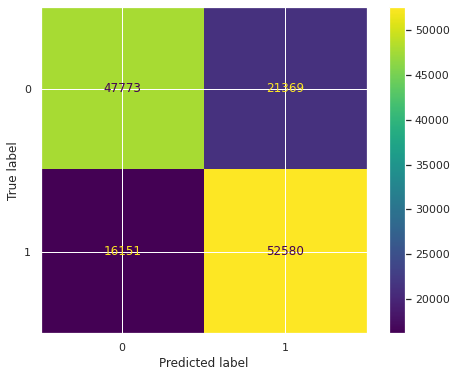

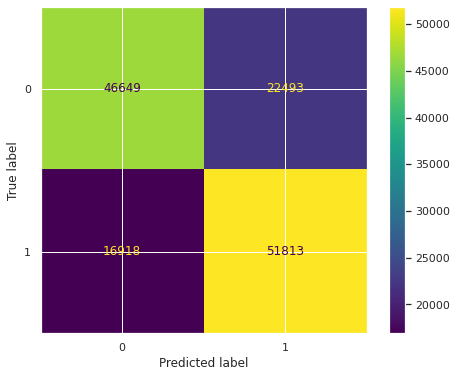

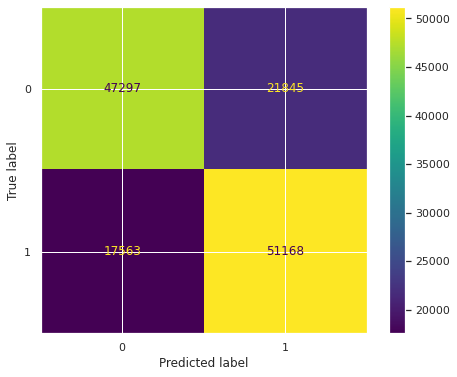

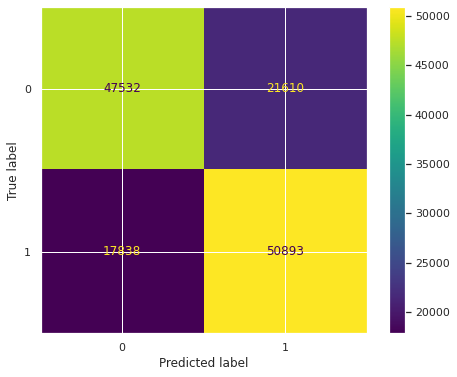

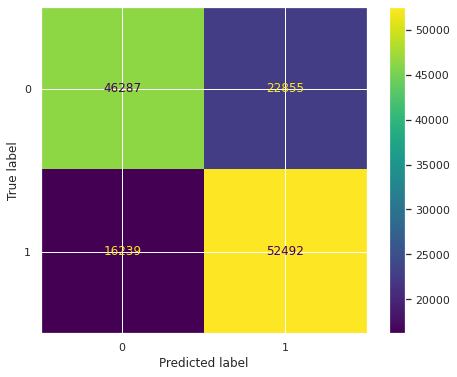

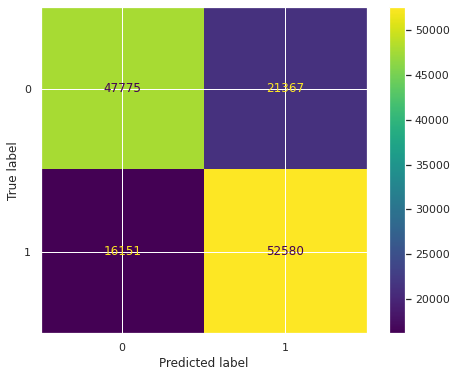

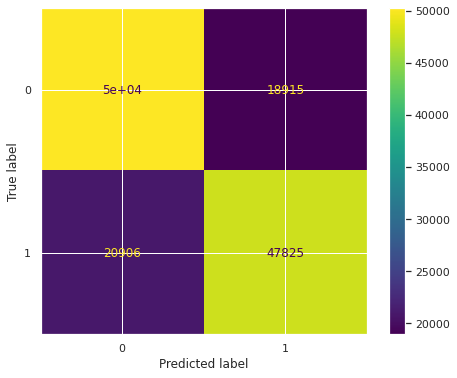

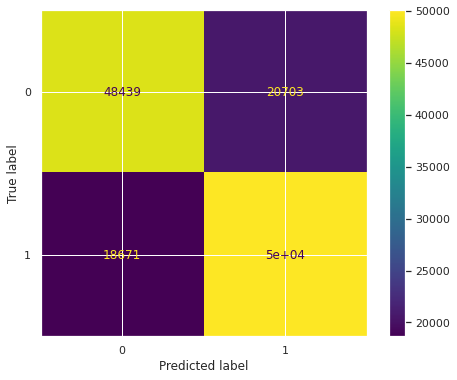

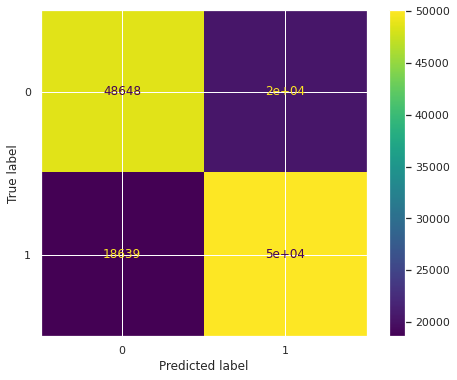

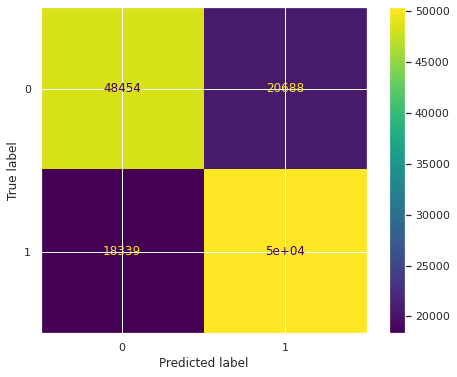

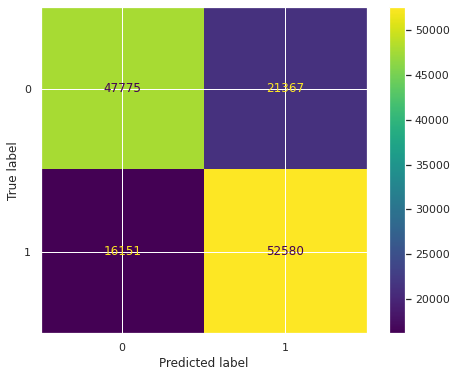

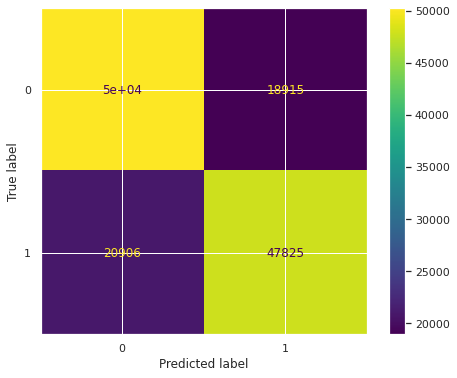

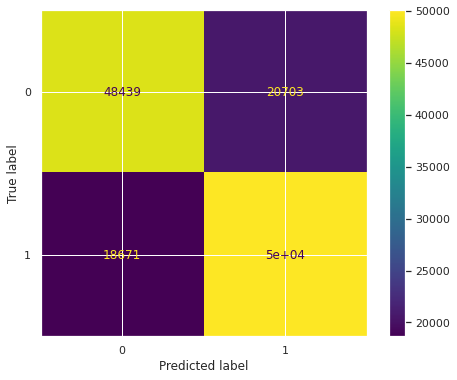

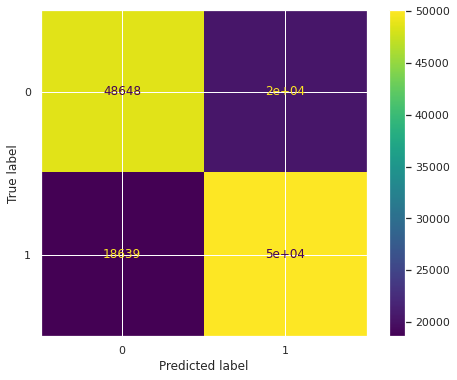

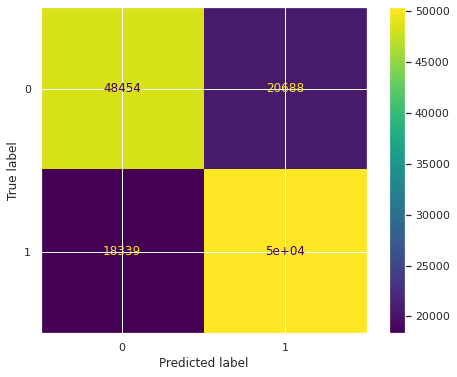

In [ ]:
from itertools import product
n_estimators=100
max_features = [1,'sqrt','log2']
max_depths=[None,2,3,4,5]

for f, d in product(max_features,max_depths):  #with product we can iterate through all possible combinations
  rf=RandomForestClassifier(n_estimators=n_estimators,
                            criterion='entropy',
                            max_features=f,
                            max_depth=d,
                            n_jobs=2,
                            random_state=1337)
  pipeline=Pipeline(steps=[("preprocessor",preprocessor),
                         ("logregressor",rf)])

  #fit the model
  rf=pipeline.fit(X_train,y_train)
  predictions=rf.predict(X=X_test)
  print("Classification accuracy n test set with max features={} and max_depth = {}: {:.3f}".format(f,d,accuracy_score(y_test,predictions)))
  cm=confusion_matrix(y_test, predictions)
  ConfusionMatrixDisplay(cm).plot()
  print("Confusion Matrix: \n",cm)
  print("Accuracy:",accuracy_score(y_test,predictions))
  print("Overall Precisions:",precision_score(y_test,predictions))
  print("Overall Recall:",recall_score(y_test,predictions),"\n")


Confusion Matrix: 
 [[48299 20843]
 [16237 52494]]
Accuracy: 0.7310568421663415
Overall Precisions: 0.715791483153115
Overall Recall: 0.7637601664459996 



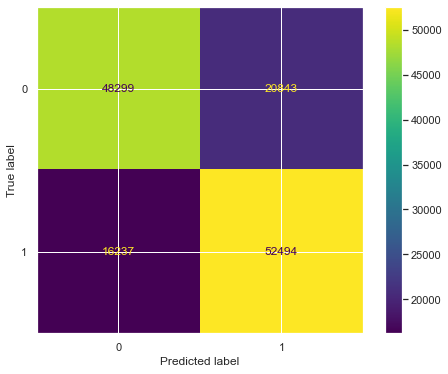

In [10]:
deployment_model=RandomForestClassifier(n_estimators=n_estimators,
                            criterion='entropy',
                            max_features=1,
                            max_depth=None,
                            n_jobs=2,
                            random_state=1337)
deployment_model=Pipeline(steps=[("preprocessor",preprocessor),
                         ("logregressor",deployment_model)])

deployment_model=deployment_model.fit(X,y)
predictions=deployment_model.predict(X=X_test)
cm=confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm).plot()
print("Confusion Matrix: \n",cm)
print("Accuracy:",accuracy_score(y_test,predictions))
print("Overall Precisions:",precision_score(y_test,predictions))
print("Overall Recall:",recall_score(y_test,predictions),"\n")

In [11]:
deployment_model=RandomForestClassifier(n_estimators=n_estimators,
                            criterion='entropy',
                            max_features=1,
                            max_depth=None,
                            n_jobs=2,
                            random_state=1337)
deployment_model.fit(X,y)
deployment_model.predict(X_test)
feature_importances=pd.DataFrame(deployment_model.feature_importances_,
                                 index=X.columns,
                                 columns=["Importance"]).sort_values("Importance", ascending=False)
feature_importances

,Importance
BMI,0.167763
Age,0.166152
Income,0.091400
GenHlth,0.087299
PhysHlth,0.080118
MentHlth,0.056070
Education,0.055204
HighBP,0.050983
HighChol,0.043106
Diabetes,0.029770


In [12]:
#make a new df with limited features after feature importances was done
df=pd.read_csv("heart.csv",error_bad_lines=False)
df=df[["HeartDiseaseorAttack","BMI","Age","Income"]]

#seperate majority and monority classes
df_majority=df[df.HeartDiseaseorAttack==0]
df_minority=df[df.HeartDiseaseorAttack==1]

df_minority_upsampled=resample(df_minority,
                              replace=True, #sample with replacement
                               n_samples=df_majority.shape[0],
                               random_state=123
                              )
df=pd.concat([df_majority,df_minority_upsampled])

scale_cols=["BMI","Income","Age"]
scaler=MinMaxScaler()
df[scale_cols]=scaler.fit_transform(df[scale_cols])
df.head()

X,y=df.drop("HeartDiseaseorAttack",axis=1).values,df["HeartDiseaseorAttack"].values #X=attribures, y=Target vector
X_train, X_test,y_train,y_test =train_test_split(X,y, test_size=0.30, random_state=0)


from itertools import product
n_estimators=100
max_features = [1,'sqrt','log2']
max_depths=[None,2,3,4,5]

for f, d in product(max_features,max_depths):  #with product we can iterate through all possible combinations
  rf=RandomForestClassifier(n_estimators=n_estimators,
                            criterion='entropy',
                            max_features=f,
                            max_depth=d,
                            n_jobs=2,
                            random_state=1337)
  pipeline=Pipeline(steps=[("preprocessor",preprocessor),
                         ("logregressor",rf)])

  #fit the model
  rf.fit(X_train,y_train)
  predictions=rf.predict(X=X_test)
  print("Classification accuracy n test set with max features={} and max_depth = {}: {:.3f}".format(f,d,accuracy_score(y_test,predictions)))
  cm=confusion_matrix(y_test, predictions)
  #ConfusionMatrixDisplay(cm).plot()
  print("Confusion Matrix: \n",cm)
  print("Accuracy:",accuracy_score(y_test,predictions))
  print("Overall Precisions:",precision_score(y_test,predictions))
  print("Overall Recall:",recall_score(y_test,predictions),"\n")


Classification accuracy n test set with max features=1 and max_depth = None: 0.710
Confusion Matrix: 
 [[42766 26376]
 [13572 55159]]
Accuracy: 0.7102550898290456
Overall Precisions: 0.6765070215244987
Overall Recall: 0.8025345186306033 

Classification accuracy n test set with max features=1 and max_depth = 2: 0.683
Confusion Matrix: 
 [[42350 26792]
 [16969 51762]]
Accuracy: 0.682599203614921
Overall Precisions: 0.6589352547292309
Overall Recall: 0.7531099503862886 

Classification accuracy n test set with max features=1 and max_depth = 3: 0.695
Confusion Matrix: 
 [[38438 30704]
 [11313 57418]]
Accuracy: 0.6952485258172376
Overall Precisions: 0.6515739542906425
Overall Recall: 0.8354017837656953 

Classification accuracy n test set with max features=1 and max_depth = 4: 0.698
Confusion Matrix: 
 [[39131 30011]
 [11619 57112]]
Accuracy: 0.6980554568334627
Overall Precisions: 0.6555329821057585
Overall Recall: 0.8309496442653242 

Classification accuracy n test set with max features=1

In [29]:
final_rf=RandomForestClassifier(n_estimators=n_estimators,
                            criterion='entropy',
                            max_features=1,
                            max_depth=5,
                            n_jobs=2,
                            random_state=1337)
 
final_rf.fit(X_test,y_test)
#final_rf_prob=final_rf.predict_proba([[41,81,100000]])[0][1]
#final_rf_prob


RandomForestClassifier(criterion='entropy', max_depth=5, max_features=1,
                       n_jobs=2, random_state=1337)

In [ ]:
#final_rf_prob[0][1]
im

In [31]:
import pickle
pickle.dump(final_rf,open('model.pkl','wb'))

In [ ]:
im

In [27]:
import joblib
#save the model as a pickle file
filename="heart_disease_model.pkl"
joblib.dump(final_rf,filename)

['heart_disease_model.pkl']

In [28]:
#load the model from the file
model=joblib.load(filename)

#Let us see an array of features
X_new=np.array([[40,9,3]])
predict_xnew=model.predict(X_new)
if predict_xnew==1:
    print("Diabetic")
else:
    print("Not diabetic")

Diabetic
